In [1]:
!pip install datasets #install datasets library to the python environment
!pip install huggingface_hub #install huggingface_hub library to the python environment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is 

In [2]:
from huggingface_hub import list_datasets
all_datasets = list(list_datasets())  # Convert generator to list
print(f"There are {len(all_datasets)} datasets currently available on the Hub")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


There are 359429 datasets currently available on the Hub


In [3]:
from datasets import load_dataset_builder # unction to load a dataset builder and inspect a dataset’s attributes without committing to downloading it
ds=load_dataset_builder('emotion')



README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

In [4]:
# Inspect dataset description
ds.info.description



''

In [5]:
#Inspect dataset features
ds.info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [6]:
from datasets import load_dataset #load the dataset by downloading from hugging face hub
emotion_ds=load_dataset('emotion')


train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [7]:
emotion_ds




DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_ds=emotion_ds['train'] #use the usual dictionary syntax to access an individual split.
train_ds #returns and instance of the Dataset class

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [9]:
print(train_ds.column_names)
print(len(train_ds))
print(train_ds[0])
print(train_ds.features) #what data types are being used under the hood by accessing the features attribute of a Dataset object#
print(train_ds[:5])


['text', 'label']
16000
{'text': 'i didnt feel humiliated', 'label': 0}
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


* The data type of the text column is
string, while the label column is a special ClassLabel object that contains information about the class names and their mapping to integers.

In [10]:
import pandas as pd
emotion_ds.set_format(type='pandas')
df=emotion_ds['train'][:]
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
## Define a function to convert an integer label to its string name
# 'row' is the integer label value (e.g., 0, 1, 2) from the DataFrame
def label_int2str(row):
    # Access the 'train' split of the emotion_ds DatasetDict
    # Then get the 'label' feature, which is a ClassLabel object
    # Use int2str() to convert the integer (row) to its string name (e.g., 0 -> 'sad')
    return emotion_ds['train'].features['label'].int2str(row)

# Apply the label_int2str function to the 'label' column of the DataFrame
# This creates a new column 'label_name' with the string names for each label
df['label_name'] = df['label'].apply(label_int2str)

# Display the first 5 rows of the DataFrame to inspect the result
df.head()


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


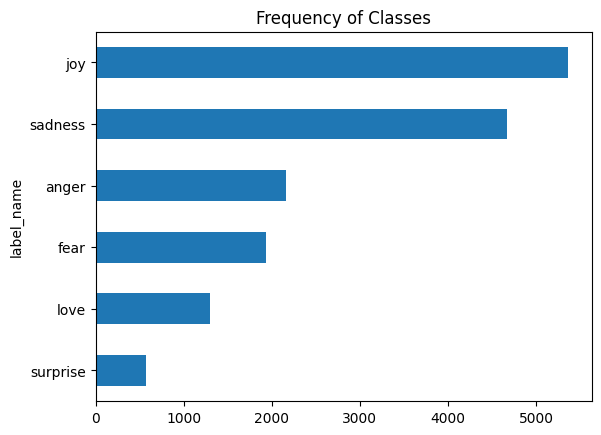

In [12]:
#Looking at the class distribution
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

 In here we can see that the dataset is heavily imbalanced; the joy and sadness
 classes appear frequently, whereas love and surprise are about 5 to 10 times rarer.

 To deal with imbalanced data;
   > * Randomly oversample the minority class.
   > * Randomly undersample the majority class.
   > * Gather more labeled data from the underrepresented classes.




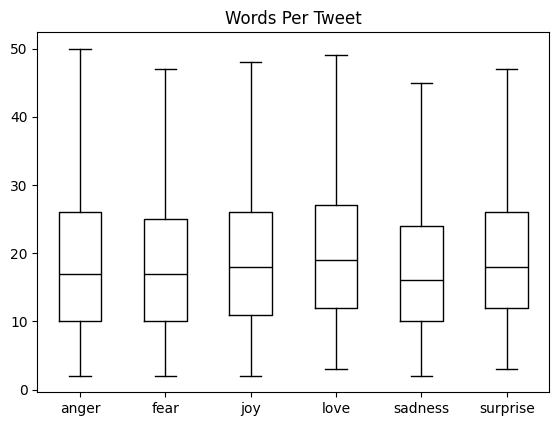

In [13]:
# Calculate the number of words in each text entry and store it in a new column
df["Words Per Tweet"]=df['text'].str.split().apply(len)
# .str.split() splits each string into a list of words (by default, splits on whitespace)
# .apply(len) counts the length of each list

# Create a boxplot to visualize the distribution of word counts grouped by label_name
df.boxplot('Words Per Tweet',by='label_name',grid=False,showfliers=False,color='black')

plt.suptitle('')
plt.xlabel('')
plt.show()

Transformer models have a maximum input sequence length that is referred to as the
 maximum context size. For applications using DistilBERT, the maximum context size
 is 512 tokens, which amounts to a few paragraphs of text.

 From the plot we see that for each emotion, most tweets are around 15 words long
 and the longest tweets are well below DistilBERT’s maximum context size



## Text to Tokens




 **Subword Tokenization**



Subword tokenization addresses the issue of "unknown" (UNK) tokens in limited-vocabulary word tokenization by breaking words into smaller, meaningful subword units (e.g., "playing" into "play" and "##ing").
.

Algorithms like Byte-Pair Encoding (BPE) or WordPiece create a flexible vocabulary of subwords, enabling models to process any word, even those not explicitly in the training corpus, without relying on a generic UNK token.



In [14]:
from transformers import AutoTokenizer
model_ckpt='distilbert-base-uncased' #specifies the model checkpoint-DistilBERT uncased version that ignores capitalization
tokenizer=AutoTokenizer.from_pretrained(model_ckpt) #retrieves the tokenizer associated with that model, including its vocabulary and tokenization rules.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
from transformers import DistilBertTokenizer
distilbert_tokenizer=DistilBertTokenizer.from_pretrained(model_ckpt)

AutoTokenizer: Ideal for flexibility, especially when experimenting with multiple models or writing generic code that can handle different model types.

DistilBertTokenizer: Preferred when you’re certain we’re working with DistilBERT and want explicit control or to avoid the slight overhead of the auto class determining the tokenizer type.

In [17]:
#AutoTokenizer class also has several attributes that provide information about the tokenizer
print(tokenizer.vocab_size)
print(tokenizer.model_max_length) #corresponding model’s maximum context size
print(tokenizer.model_input_names) # the names of the fields that the model expects in its forward pass

30522
512
['input_ids', 'attention_mask']


In [18]:
#Tokenize the whole dataset
#To tokenize the whole corpus, we’ll use the map() method of our DatasetDict object.
def tokenize(batch):
    text_batch = batch['text'] #.tolist() #The .tolist() method is used to convert the pandas Series (which represents the 'text' column) to a Python list of strings
    return tokenizer(text_batch, padding=True, truncation=True)
#padding=True will pad the examples with zeros to the size of the longest one in a batch
#truncation=True will truncate the examples to the model’s maximum context size.


In [19]:
#pass a batch of two examples from the training set
emotion_ds.reset_format()
print(emotion_ds["train"][:2])
print(tokenize(emotion_ds["train"][:2]))

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'], 'label': [0, 0]}
{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


the tokenizer returns a list of attention_mask arrays. This is because we do not want the model to get confused by the additional padding tokens: the attention mask allows the model to ignore the padded parts of the input.

In [20]:
#apply the defined the processing function across all the splits in the corpus
emotions_encoded = emotion_ds.map(tokenize, batched=True, batch_size=None)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [21]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Training a Text Classifier

+ Models like DistilBERT are pretrained to predict masked words in a sequence of text which involves a task called Masked Language Modeling (MLM)

+ The goal is to give the model a broad understanding of language before fine-tuning it for specific tasks

+ We can’t use these language models directly for text classification; we need to modify them slightly.


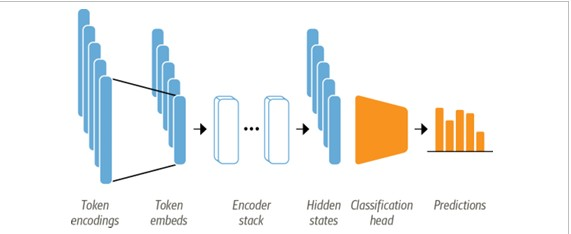

1. Text Tokenization and Token Encodings
    >> tokenizing the input text (e.g., a tweet) using a tokenizer like the one for DistilBERT (which uses WordPiece, as discussed earlier)
    >> Each token is represented as a one-hot vector called a token encoding(The size of this vector equals the tokenizer’s vocabulary size, typically 20,000–200,000 unique tokens)
2. Conversion to Token Embeddings:
    >> The one-hot token encodings are converted into token embeddings, which are dense, lower-dimensional vectors (e.g., 768 dimensions for DistilBERT).
3. Encoder Stack (Transformer Layers):
    >> The token embeddings are passed through a stack of transformer encoder layers (e.g., 6 layers in DistilBERT, compared to 12 in BERT)

4. Adapting for Sequence Classification:
    >>For a task like sequence classification (e.g., classifying a tweet as positive or negative), the language modeling layer used in pretraining is replaced with a classification head:




Two options to train a model on our twitter dataset
1. Feature extraction

 We use the hidden states as features and just train a classifier on them, without
 modifying the pretrained model.
2. Fine-tuning

 We train the whole model end-to-end, which also updates the parameters of the
 pretrained model.

In [23]:
#Feature Extractor
import torch
from transformers import AutoModel #AutoModel is a class in the Transformers library that automatically loads the appropriate model architecture based on the checkpoint name.
model_ckpt='distilbert-base-uncased' #refers to the base version of DistilBERT, where "uncased" means the model is case-insensitive (e.g., it treats "Cat" and "cat" the same)
device=torch.device("cuda" if torch.cuda.is_available() else "cpu") #determines where the model will run
#If a GPU is available (torch.cuda.is_available() returns True), the device is set to "cuda" (GPU) Otherwise, it defaults to "cpu"
model=AutoModel.from_pretrained(model_ckpt).to(device)
#This ensures that the model will run on the GPU if we have one. If not, the model will run on the CPU,which can be considerably slower.


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

**Model Architecture:**

The loaded DistilBERT model consists of:
An embedding layer:
Converts input_ids into 768-dimensional token embeddings.

6 transformer encoder layers: Each layer applies self-attention and feed-forward networks to produce contextualized hidden states.

No classification head: AutoModel loads the base model, not a task-specific version (e.g., DistilBertForSequenceClassification would include a classification head).

**Weights:**

The from_pretrained() method loads the pretrained weights, which were trained on a large corpus using MLM. These weights enable the model to understand language contextually.

Device Placement:
Moving the model to the GPU ("cuda") ensures faster computation, especially for batched inputs or large datasets. PyTorch handles the transfer of model parameters (weights) to the GPU memory.

In [24]:
#example: extracting the last hidden state
text=['this is a test','this is another test cat']
inputs=tokenizer(text,return_tensors='pt',truncation=True,padding=True)
print(inputs)
print(inputs['input_ids'].size())

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102,    0],
        [ 101, 2023, 2003, 2178, 3231, 4937,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1]])}
torch.Size([2, 7])


In [25]:
inputs={k:v.to(device) for k,v in inputs.items()}
with torch.no_grad(): # Disables gradient computation to save memory and speed up inference, since we’re not training the model (just extracting hidden states)
  outputs=model(**inputs) # Passes the tokenized inputs through the DistilBERT model (loaded via AutoModel)
                          # **inputs unpacks the dictionary into model(input_ids=..., attention_mask=...)

print(outputs)



BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         ...,
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619],
         [ 0.0352, -0.3883,  0.0161,  ...,  0.0221,  0.0190,  0.4101]],

        [[-0.1832, -0.1942,  0.0646,  ..., -0.1320,  0.2685,  0.4623],
         [-0.4531, -0.5475,  0.0409,  ..., -0.3700,  0.7871,  0.3559],
         [-0.5335, -0.3953,  0.2468,  ..., -0.1153,  0.3525,  0.9389],
         ...,
         [ 0.4684, -0.3193, -0.0180,  ..., -0.4025,  0.2801, -0.3888],
         [-0.1065, -0.2727, -0.0648,  ...,  0.1755,  0.1977,  0.3894],
         [ 0.9036,  0.1078, -0.4699,  ...,  0.0449, -0.5993, -0.2306]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [26]:
print(outputs.last_hidden_state.shape)

torch.Size([2, 7, 768])


Looking at the hidden state tensor, we see that it has the shape [batch_size,n_tokens, hidden_dim]

Each 768-dimensional vector is a contextualized representation of a token, capturing its meaning in the context of the entire sequence.

as example the hidden state for "test" reflects its role in the sentence "this is a test", influenced by the surrounding tokens via the transformer’s self-attention mechanism.

In [27]:
#extracting the hidden state of the [CLS] token (the first token)
print(outputs.last_hidden_state[:,0].size())
print(outputs.last_hidden_state[:,0,:])

torch.Size([2, 768])
tensor([[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
        [-0.1832, -0.1942,  0.0646,  ..., -0.1320,  0.2685,  0.4623]],
       device='cuda:0')


### Preparing the Dataset for Training

In [28]:

def extract_hidden_state(batch):#returns a dictionary with a new key "hidden_state" containing the [CLS] hidden states as a NumPy array,which will become a new column in the dataset.
  # Place model inputs on the GPU
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  #tokenizer.model_input_names is a list of keys that the model expects as input (e.g., ["input_ids", "attention_mask"] for DistilBERT).
  #This ensures you only include the relevant inputs for the model, ignoring other columns like "label" or "text"

  # Extract last hidden states
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  # Return vector for [CLS] token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}


In [29]:
#our model expects tensors as inputs, so we convert the input_ids and attention_mask columns to the "torch" format
emotions_encoded.set_format('torch',columns=['input_ids','attention_mask','label'])
emotions_encoded['test']['attention_mask'].type()


'torch.LongTensor'

In [30]:
# extract the hidden states across all splits in one go
emotions_hidden = emotions_encoded.map(extract_hidden_state, batched=True)
#we did not set batch_size=None in this case, which means the default batch_size=1000


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [31]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

### Training the classifier

In [32]:
 #creating a feature matrix
 import numpy as np
 X_train = np.array(emotions_hidden["train"]["hidden_state"])
 X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
 y_train = np.array(emotions_hidden["train"]["label"])
 y_valid = np.array(emotions_hidden["validation"]["label"])
 X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [33]:
#Visualizing the training set
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#Scale Features to [0,1] range
X_scaled= MinMaxScaler().fit_transform(X_train)

#Intialize and fit UMAP
mapper=UMAP(n_components=2,metric='cosine').fit(X_scaled)

#create a dataframe of 2D embedding
df_emb=pd.DataFrame(mapper.embedding_,columns=['X','Y'])
df_emb['label']=y_train
df_emb.head()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,4.034152,6.526262,0
1,-3.034603,5.462223,0
2,5.409991,3.187404,3
3,-2.331615,3.434491,2
4,-3.230303,3.584095,3


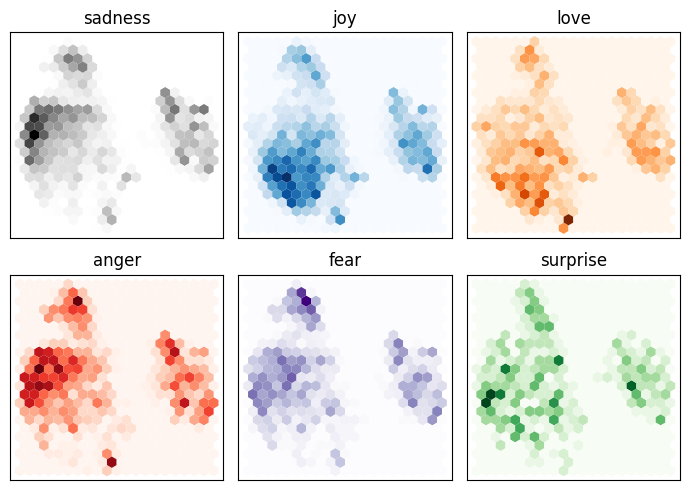

In [34]:
#Visualize the reduced dimensional data
#generates a grid of hexbin plots to visualize 2D data
fig, axes = plt.subplots(2, 3, figsize=(7,5))

# Flatten the 2D axes array into a 1D array for easier iteration
axes = axes.flatten()

# Define colormaps for each emotion's hexbin plot
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]

# Extract emotion labels from the dataset's training split
labels = emotion_ds["train"].features["label"].names

# Iterate over labels and colormaps, with index for axes
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  # Filter the DataFrame for the current emotion label
  df_emb_sub = df_emb.query(f"label == {i}")

  # Create a hexbin plot for the current emotion's X, Y coordinates
  axes[i].hexbin(
      df_emb_sub["X"],
      df_emb_sub["Y"],
      cmap=cmap,
      gridsize=20,
      linewidths=(0,))

  # Set the subplot title to the emotion label
  axes[i].set_title(label)

  # Remove x and y axis ticks for a cleaner look
  axes[i].set_xticks([]),
  axes[i].set_yticks([])
plt.tight_layout()
plt.show()



+ From this plot we can see some clear patterns: the negative feelings such as sadness,
 anger, and fear all occupy similar regions with slightly varying distributions

+ On the other hand, joy and love are well separated from the negative emotions and also share a similar space.

+ Finally, surprise is scattered all over the place

Training a simple classifier

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Custom Dataset for emotion classification
class EmotionDataset(Dataset):
    def __init__(self, embeddings, labels):
        """
        embeddings: tensor or array of shape (n_samples, 768)
        labels: tensor or array of shape (n_samples,) with values 0 to 5
        """
        self.embeddings = torch.tensor(embeddings, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

# Dense Neural Network for emotion classification
class EmotionClassifier(nn.Module):
    def __init__(self, input_dim=768, hidden_dims=[512, 256, 128], output_dim=6):
        super(EmotionClassifier, self).__init__()

        # Define layers
        layers = []
        prev_dim = input_dim

        # Hidden layers with ReLU and dropout
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.3)
            ])
            prev_dim = hidden_dim

        # Output layer
        layers.append(nn.Linear(prev_dim, output_dim))

        # Combine into sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Function to print model architecture and parameter count
def inspect_model(model):
    """
    Display model architecture, layers, and parameter counts.
    """
    print("\n=== Model Architecture ===")
    print(model)

    print("\n=== Layer Details ===")
    for name, module in model.named_modules():
        if name:  # Skip the root module
            print(f"{name}: {module}")

    print("\n=== Parameter Counts ===")
    total_params = 0
    for name, param in model.named_parameters():
        param_count = param.numel()
        total_params += param_count
        print(f"{name}: {param.shape} ({param_count} parameters)")
    print(f"Total Trainable Parameters: {total_params:,}")

# Function to plot loss curves
def plot_loss_curves(train_losses, val_losses):
    """
    Plot training and validation loss curves.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Training and evaluation function (with best weights saving)
def train_model(model, train_loader, val_loader, test_loader, epochs=10, lr=0.001, device='cuda', save_path='best_emotion_classifier.pth'):
    model = model.to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Track losses and best validation loss
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')  # Initialize to infinity
    best_epoch = 0

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_loss /= train_total
        train_acc = train_correct / train_total
        train_losses.append(train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= val_total
        val_acc = val_correct / val_total
        val_losses.append(val_loss)

        # Save best weights if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch + 1
            torch.save(model.state_dict(), save_path)
            print(f'  Saved best weights at epoch {best_epoch} with Val Loss: {best_val_loss:.4f}')

        print(f'Epoch {epoch+1}/{epochs}: '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Test phase (using best weights)
    model.load_state_dict(torch.load(save_path))  # Load best weights
    model.eval()
    test_correct = 0
    test_total = 0
    test_probabilities = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            test_probabilities.append(probs.cpu())

            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_acc = test_correct / test_total
    test_probabilities = torch.cat(test_probabilities).numpy()

    print(f'\nTest Accuracy (best weights): {test_acc:.4f}')
    print(f'Sample Test Probabilities (first 5 samples):\n{test_probabilities[:5]}')

    # Plot loss curves
    plot_loss_curves(train_losses, val_losses)

    return test_acc, test_probabilities, train_losses, val_losses

# Main function
def main(X_train, y_train, X_val, y_val, X_test, y_test):
    # Create datasets
    train_dataset = EmotionDataset(X_train, y_train)
    val_dataset = EmotionDataset(X_val, y_val)
    test_dataset = EmotionDataset(X_test, y_test)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize model
    model = EmotionClassifier(input_dim=768, hidden_dims=[512, 256, 128], output_dim=6)

    # Inspect model before training
    inspect_model(model)

    # Train and evaluate
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    test_acc, test_probabilities, train_losses, val_losses = train_model(
        model, train_loader, val_loader, test_loader, epochs=50, lr=0.001,
        device=device, save_path='best_emotion_classifier.pth'
    )

    return model, test_acc, test_probabilities


    # Run training, evaluation, and visualization
    model, test_acc, test_probabilities = main(
        X_train, y_train, X_val, y_val, X_test, y_test
    )

In [36]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_test = np.array(emotions_hidden["test"]["hidden_state"])
y_test = np.array(emotions_hidden["test"]["label"])


=== Model Architecture ===
EmotionClassifier(
  (model): Sequential(
    (0): Linear(in_features=768, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=128, out_features=6, bias=True)
  )
)

=== Layer Details ===
model: Sequential(
  (0): Linear(in_features=768, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=128, out_features=6, bias=True)
)
model.0: Linear(in_features=768, out_features=512, bias=True)
model.1: ReLU()


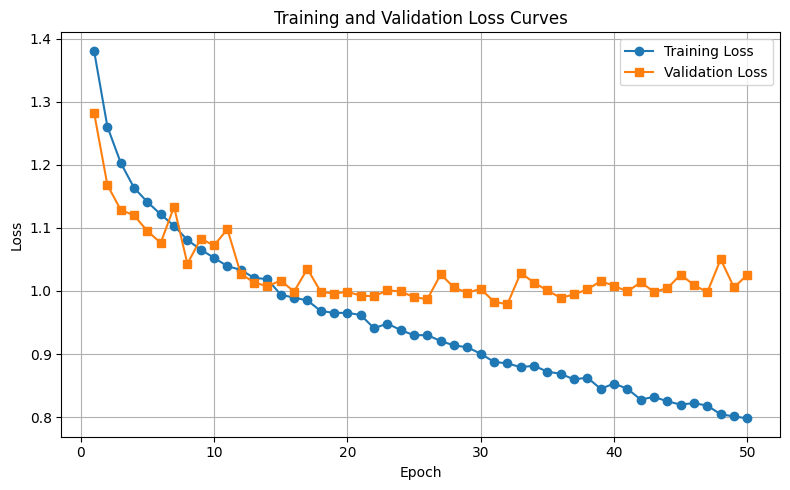

In [37]:

# Run training, evaluation, and visualization
model, test_acc, test_probabilities = main(
        X_train, y_train, X_valid, y_valid, X_test, y_test
    )

In [38]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)


0.635

Both Logistic Regression and a simple Dense Neural Network achieve around 63% accuracy.

This consistent result suggests that 63% may be the performance limit with the current features and setup.

To determine whether this accuracy is genuinely good or close to random guessing, we compare it to a baseline model.

In [42]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

A Dummy Classifier that always predicts the most frequent class achieves only 35% accuracy.

Therefore, 63% is significantly better than the baseline, meaning the model has learned meaningful patterns.

To analyze the model's behavior in more detail, we examine the confusion matrix.

This helps us see which classes are often misclassified.

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()


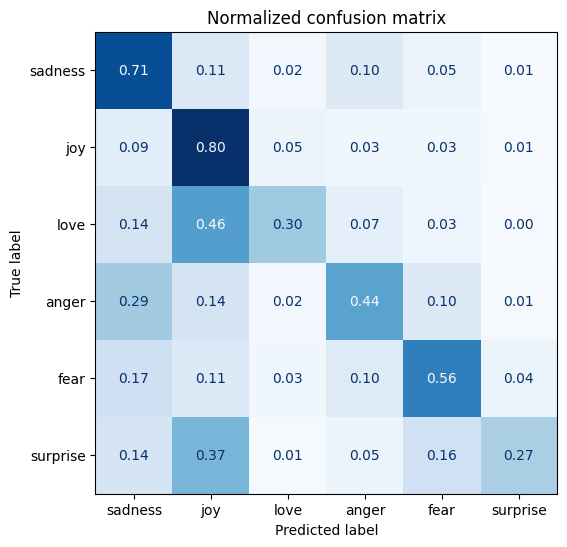

In [40]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

Anger and fear are often confused with sadness, reflecting emotional similarity and matching what we saw in the embedding visualization.

Love and surprise are frequently predicted as joy, likely due to overlapping expressions or features in the data.

These misclassifications show that the model struggles with subtle emotional differences, especially between positive or negative emotional tones.

**Fine-Tuning Transformers**

When using the fine-tuning approach the whole DistilBERT model is trained
 along with the classification head.

Use the AutoModelForSequenceClassification from the Hugging Face Transformers library instead of AutoModel.

Purpose of AutoModelForSequenceClassification: This model includes a classification head on top of the pretrained DistilBERT model, enabling easy training for classification tasks.





In [43]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))
#Configure the model to predict six labels, as this determines the number of outputs in the classification head.

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
#Defining the performance metric
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
 labels = pred.label_ids
 preds = pred.predictions.argmax(-1)
 f1 = f1_score(labels, preds, average="weighted")
 acc = accuracy_score(labels, preds)
 return {"accuracy": acc, "f1": f1}

In [46]:
#Training the Model
from huggingface_hub import notebook_login
notebook_login()

The TrainingArguments class defines and stores all hyperparameters and configurations for training and evaluating a model.

Trainer executes the training process, using the configurations from TrainingArguments and coordinating the model, datasets, and metrics.

In [49]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  eval_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,log_level="error")



In [50]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

<ipython-input-50-db53a9d045a2>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: raveeshaanuruddha645 (raveeshaanuruddha645-university-of-moratuwa) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.797400,0.305695,0.909000,0.908562
2,0.248200,0.211953,0.927500,0.927288


Looking at the logs, we can see that our model has an F1-score on the validation set of around 92%—this is a significant improvement over the feature-based approach

In [52]:
#get the predictions on the validation set.
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.2119530886411667,
 'test_accuracy': 0.9275,
 'test_f1': 0.9272876167844255,
 'test_runtime': 4.3271,
 'test_samples_per_second': 462.207,
 'test_steps_per_second': 7.395}

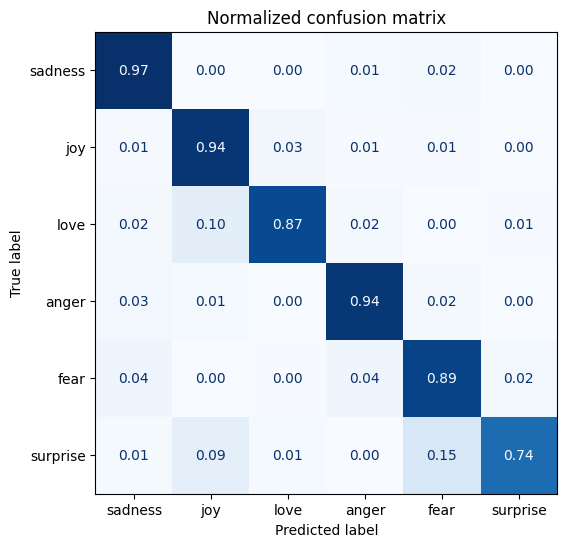

In [53]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

This is much closer to the ideal diagonal confusion matrix. The love category is still
 often confused with joy, which seems natural. surprise is also frequently mistaken
 for joy, or confused with fear. Overall the performance of the model is
 good.